In [ ]:
##Ingreso por Municipio y Diagnóstico

In [2]:
import pandas as pd

# Cargar el archivo 'Meliza.csv'
data_meliza = pd.read_csv('Municipio_Diagnostico.csv')

# Mostrar las primeras filas del dataset
data_meliza.head()

,Edad,Sexo,Raza,Municipio,Provincia,ÁreaSalud,Sala,Cama,Diagnóstico,Especialidad,Unidad,Egreso,Destino
0,16,F,B,Cruces,Cienfuegos,Cruces,1A,1,Asma Bronquial,Resp,HGAL,5:30 PM,Alta
1,12,M,N,Palmira,Cienfuegos,Palmira,7B,4,SDB (1B),Cirugía,HGAL,7:00 AM,Alta
2,21,F,M,Cruces,Cienfuegos,Cruces,4B,16,HQ Apendicitis,MI,HGAL,8:00 PM,1A
3,19,M,B,Cienfuegos,Cienfuegos,Área I,11A,8,Dolor Abdominal,MI,HGAL,6:10 AM,Alta
4,46,M,B,Cienfuegos,Cienfuegos,Área II,9B,7,Anemia,MI,HGAL,6:00 PM,Alta


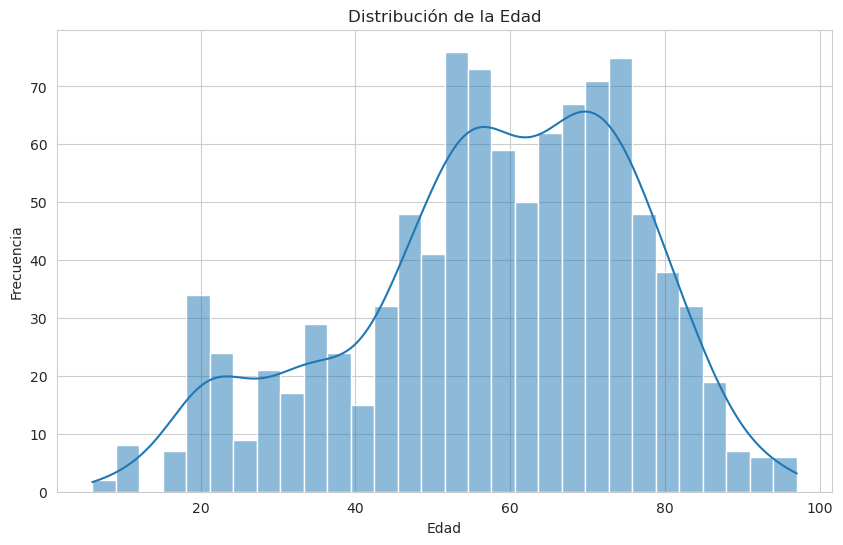

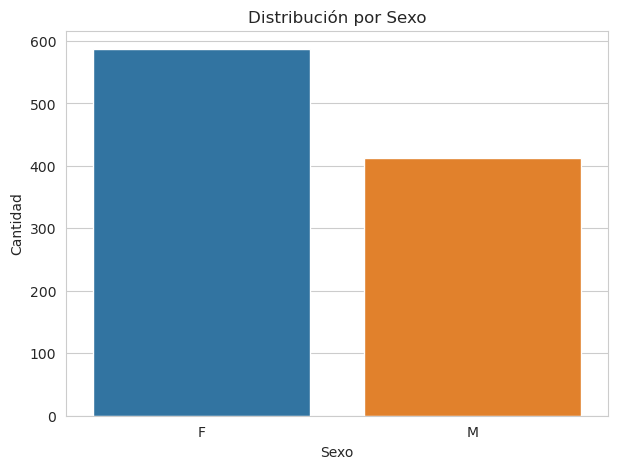

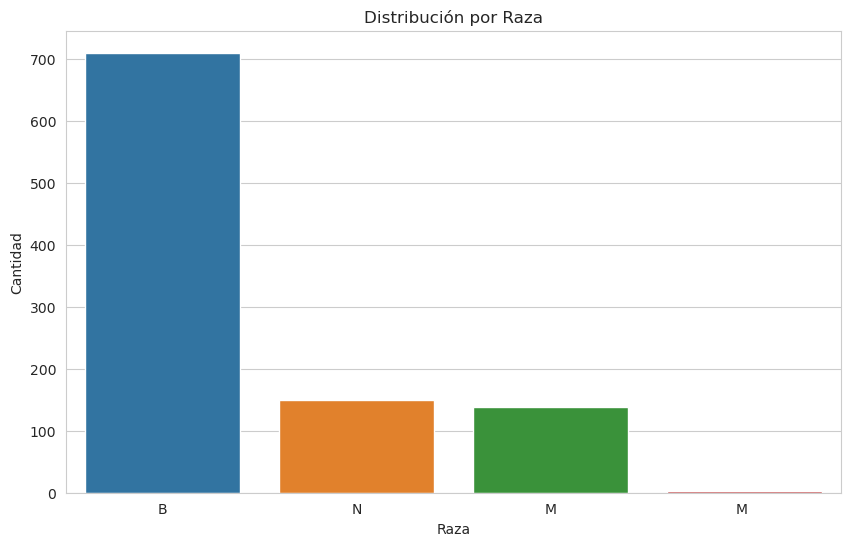

,Edad,Sexo,Raza,Municipio,Provincia,ÁreaSalud,Sala,Cama,Diagnóstico,Especialidad,Unidad,Egreso,Destino
count,1000.000000,999,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000,950,1000
unique,NaN,2,4,9,1,16,13,NaN,8,3,1,10,3
top,NaN,F,B,Cienfuegos,Cienfuegos,Área VIII,1A,NaN,NAC,MI,HGAL,7:00 AM,Alta
freq,NaN,587,710,693,1000,150,128,NaN,196,520,1000,158,845
mean,57.737000,NaN,NaN,NaN,NaN,NaN,NaN,6.872000,NaN,NaN,NaN,NaN,NaN
std,18.310082,NaN,NaN,NaN,NaN,NaN,NaN,3.455946,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn
sns.set_style('whitegrid')

# Descripción general de los datos
data_description = data_meliza.describe(include='all')

# Visualización de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data_meliza['Edad'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución por sexo
plt.figure(figsize=(7, 5))
sns.countplot(data=data_meliza, x='Sexo')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

# Visualización de la distribución por raza
plt.figure(figsize=(10, 6))
sns.countplot(data=data_meliza, x='Raza')
plt.title('Distribución por Raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.show()

data_description

In [5]:
# Crear rangos de edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data_meliza['Rango de Edad'] = pd.cut(data_meliza['Edad'], bins=bins, labels=labels, right=False)

# Crear una tabla cruzada con Sexo y Rango de Edad
cross_tab_sex_age_range_meliza = pd.crosstab(data_meliza['Sexo'], data_meliza['Rango de Edad'])
cross_tab_sex_age_range_meliza

Rango de Edad,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
Sexo,,,,,,,,,,
F,0,7,39,39,62,132,124,126,47,11
M,2,16,37,34,47,82,76,77,37,4


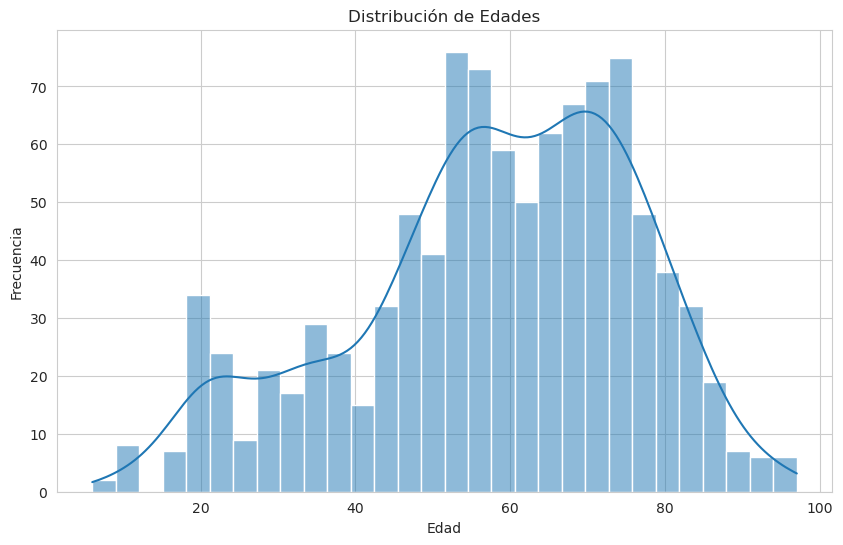

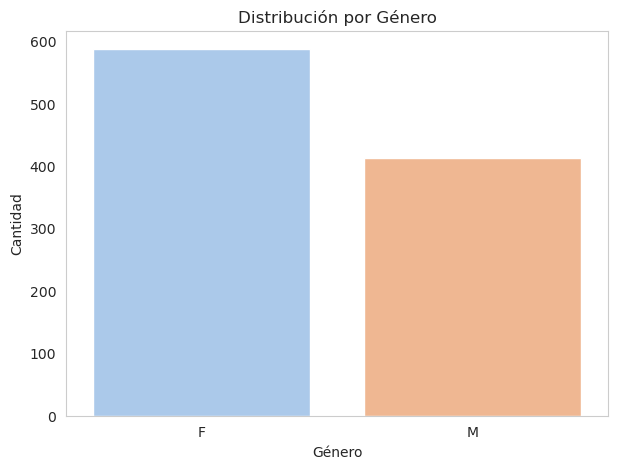

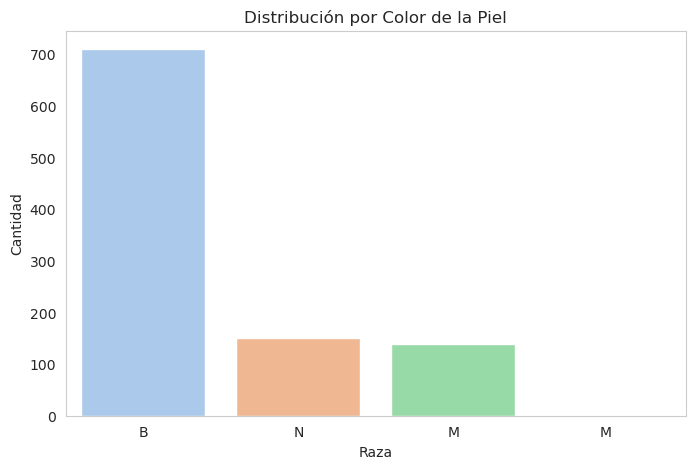

In [7]:
# Visualización de la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(data_meliza['Edad'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Visualización de la distribución por género
plt.figure(figsize=(7, 5))
sns.countplot(x='Sexo', data=data_meliza, palette='pastel')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

# Visualización de la distribución por raza
plt.figure(figsize=(8, 5))
sns.countplot(x='Raza', data=data_meliza, palette='pastel')
plt.title('Distribución por Color de la Piel')
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

In [8]:
crosstab_raza_diagnostico = pd.crosstab(data_meliza['Diagnóstico'], data_meliza['Raza'], margins=True, margins_name='Total')
crosstab_raza_diagnostico

Raza,B,M,M,N,Total
Diagnóstico,,,,,
Anemia,115,24,1,25,165
Asma Bronquial,61,12,0,15,88
Dolor Abdominal,29,6,0,4,39
HQ Apendicitis,111,18,0,19,148
Lifrangitis Aguda,119,25,0,27,171
NAC,136,32,1,27,196
SDB (1B),2,0,0,1,3
SFA+ Dengue,137,21,0,32,190
Total,710,138,2,150,1000
